In [ ]:
#Author: AI Boot Camp
#Topic: DBSCAN Clustering

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [55]:
# Importing Libraries
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

### **DB SCAN Clustering**

- Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. 
-  To run DB Scan, it doesn’t require an input for the number of clusters 
- But **DBSCAN does need to tune three other parameters**
  1.  **'eps' parameter** 
    - Same as Radius of the circle
    - It is the maximum distance between two data points to be considered in the same neighborhood
    - It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors.
    - If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. 
    - One way to **find the eps value is based on the k-distance graph**
  2. **'min_samples' parameter** 
    - It is the minimum amount of data points in a neighborhood to be considered a cluster
    - Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. 
    - As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1.
    - The minimum value of MinPts must be chosen at least 3.
  3. **'metric' parameter**
    - The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 


- In this algorithm, **we have 3 types of data points.**
  1. **Core Point:** A point is a core point if it has more than MinPts points within eps(radius). 
  2. **Border Point:** A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
  3. **Noise or outlier:** A point which is not a core point or border point.


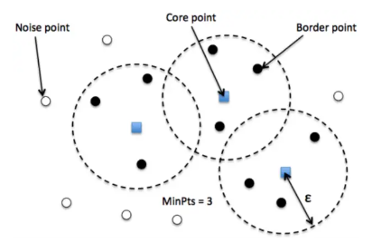

In [56]:

from IPython.display import Image
Image('imgs/dbscan.png')


### **STEPS IN DB SCAN**
**STEP 1** -  Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.

**STEP 2** - For each core point if it is not already assigned to a cluster, create a new cluster.

**STEP 3** - Find recursively all its density connected points and assign them to the same cluster as the core point.

**STEP 4** - A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a **chaining process**. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
Iterate through the remaining unvisited points in the dataset. 

**NOTE** Those points that do not belong to any cluster **are noise.**

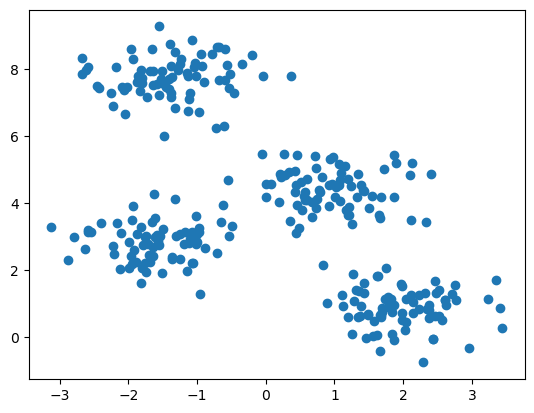

In [57]:
# Lets take an sample example
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

###**Calculate Epsilon**
  - In layman’s terms, we find a suitable value for epsilon by **calculating the distance to the nearest n points for each point, sorting and plotting the results.** 
  - Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

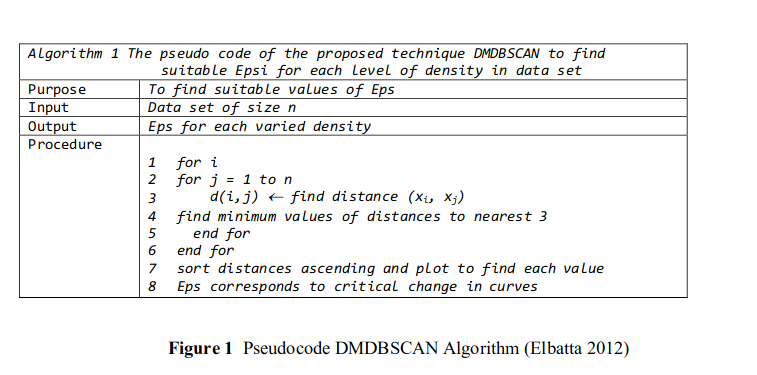

In [58]:
Image('imgs/dbscan_algorithm.png')

In [59]:
# Let's take another example
# Step 1-

# Here, I am creating a dataset with only two features so that we can visualize it easily. 
# For creating the dataset I have created a function PointsInCircum 
# which takes the radius and number of data points as arguments 
# and returns an array of data points which when plotted forms a circle. 
# We do this with the help of sin and cosine curves.

np.random.seed(42)
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Step 2-
# One circle won’t be sufficient to see the clustering ability of DBSCAN.
# Therefore, I have created three concentric circles of different radii.
# Also, I will add noise to this data so that we can see how different types of clustering algorithms deals
# with noise.

# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

print(df.head())

            0          1
0  484.891555 -31.006357
1  489.391178  21.973916
2  462.886575 -27.599889
3  517.218479   5.588090
4  455.669049   1.982181


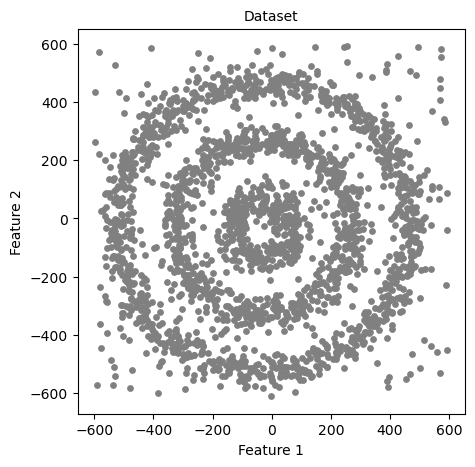

In [60]:
# Step 3
# Let’s plot these data points and see how they look in the feature space. 
# Here, I use the scatter plot for plotting these data points. Use the following syntax:

plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

In [61]:
# K-Means vs. Hierarchical vs. DBSCAN Clustering
# 1. K-Means
from sklearn.cluster import KMeans

k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

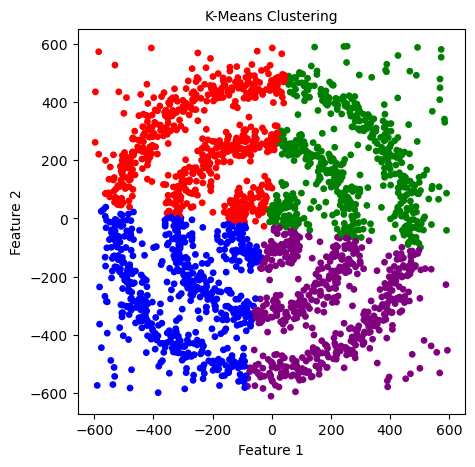

In [62]:
# Plotting K Means
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

In [63]:
# 2. Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

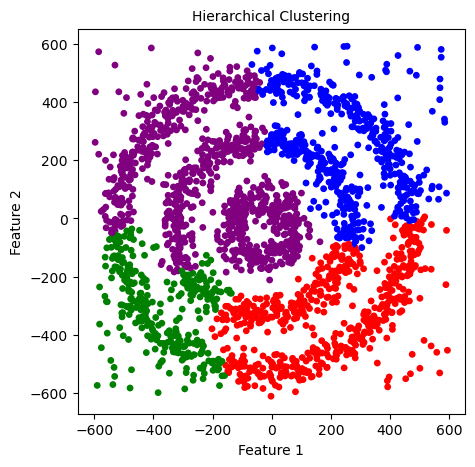

In [64]:
# Plotting Hierarchical Clustering
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

In [65]:
# 3. DB Scan
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

#Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:

DBSCAN()

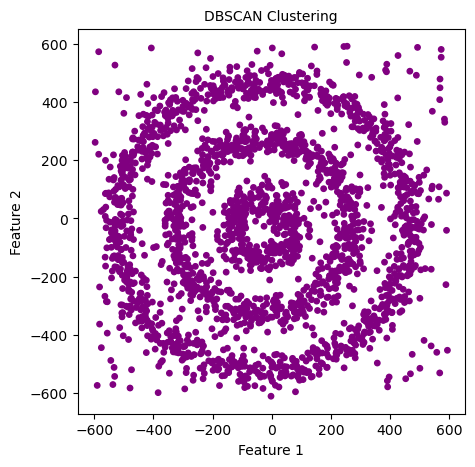

In [66]:
# DB Scan Plot
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

# Interesting! All the data points are now of purple color which means they are treated as noise. 
# It is because the value of epsilon is very small and we didn’t optimize parameters.
# Therefore, we need to find the value of epsilon and minPoints and then train our model again.

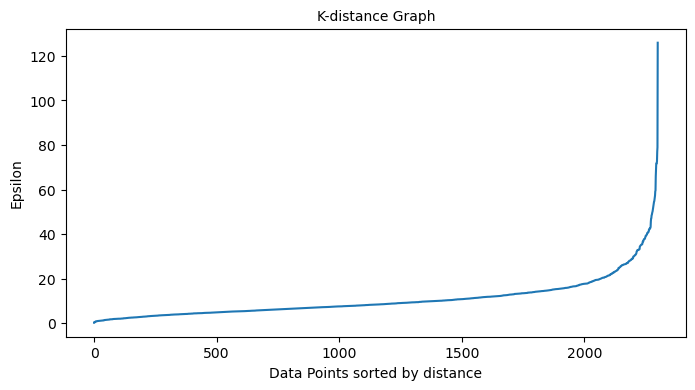

In [67]:
# For epsilon, use the K-distance graph. 
# For plotting a K-distance Graph, 
# we need the proximity matrix (distance between a point and its nearest data point for all data points in the dataset). 
# We obtain this using NearestNeighbors from sklearn.neighbors.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

# The distance variable contains an array of distances between a data point and 
# its nearest data point for all data points in the dataset.

# Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, 
# which is 30 in this case. Now, it’s time to find the value of minPoints.
# The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [68]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [69]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

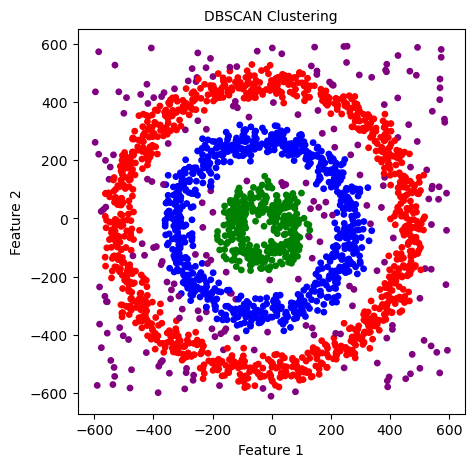

In [70]:
# The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

# Plotting the resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

In [71]:
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
# Preparing Data

# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note that we transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [34]:
# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_2 = dict(zip(unique, counts))
print(freq_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 50, 1: 50, 2: 50}


In [35]:
# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

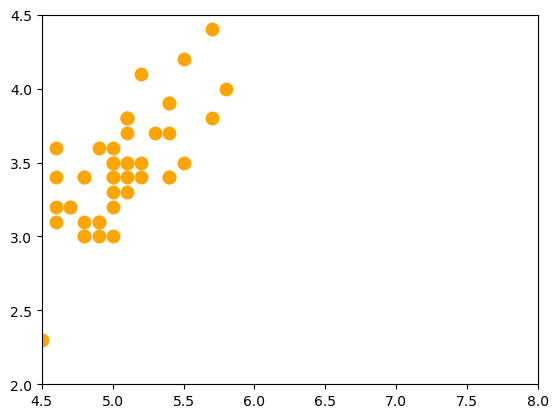

In [36]:
# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [37]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

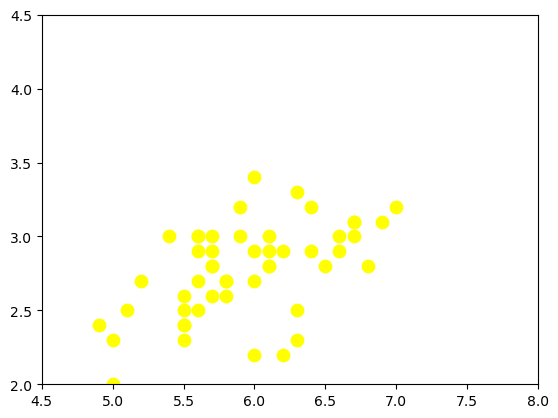

In [38]:
# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [39]:
# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
100                6.3               3.3
101                5.8               2.7
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0


Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




(2.0, 4.5)

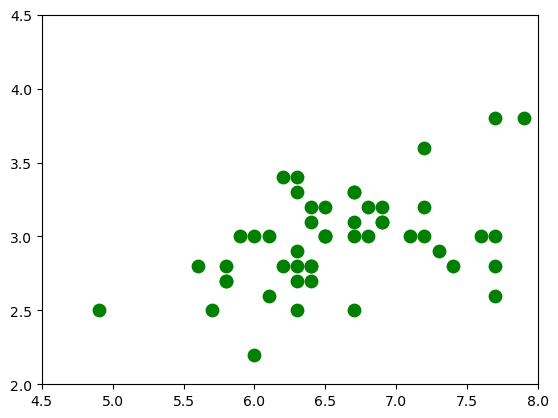

In [40]:
# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

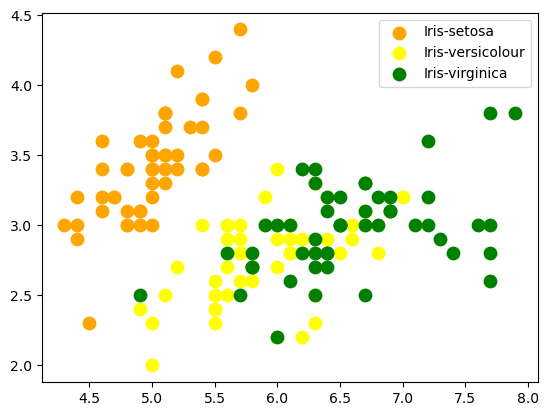

In [41]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# We find that we have three classes with two types of Iris flowers overlapping each other

In [42]:
# Scale Data
df = iris_data.iloc[:,:-1]

for col in df.columns:
  avg = df[col].mean()
  sd = df[col].std()
  df[col] = df[col].apply(lambda x: (x-avg)/sd)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [43]:
# DBSCAN Clustering

min_samples = df.shape[1]*2 # Columns = 4*2 = 8 Min Samples
# Declaring Model
dbscan = DBSCAN(eps = 0.5,min_samples = min_samples)

# By Default Parameters in dbscan
dbscan

DBSCAN(min_samples=8)

In [44]:
# Fitting the model
clusters = dbscan.fit_predict(df)
print("Clusters Created : "+str(list(set(clusters))))

# Inference:
# -1 suggests data point is not in any clusters (outliers)
# So Three clusters are created : 0,1,2

Clusters Created : [0, 1, 2, -1]


In [45]:
# Here value is minimum=2 because in sklearn library, algorithim consider itself also
# So first distance will be 0 because it is calculating distance from point to its own point
# Therefore we need another point(minimum) to calculate a distance (more than 0)
# So we consider minimum two point(one point itself and another data point)
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors= k).fit(df)
distances, indices = nbrs.kneighbors(df) 

In [46]:
print("Minimum Samples : "+str(min_samples))
print("Shape of Distance Matrix : "+ str(distances.shape)+"\n")
print("Showing distance to each datapoints (small to large distance) from itself")
print("8 because we mentioned Minimum Samples = 8")
print("Last value 8th row will be highest among all the 8 Distances (8-NN)\n")

print("First 5 Datapoints of the dataset:")
for enum, row in enumerate(distances[:5]):
  print("observations "+str(enum)+":"+str([round(x,2) for x in row]))

# Inference :
# 150 is the number of Rows
# 8 is the distance to 8 data points from each observations

Minimum Samples : 8
Shape of Distance Matrix : (150, 8)

Showing distance to each datapoints (small to large distance) from itself
8 because we mentioned Minimum Samples = 8
Last value 8th row will be highest among all the 8 Distances (8-NN)

First 5 Datapoints of the dataset:
observations 0:[0.0, 0.13, 0.13, 0.19, 0.24, 0.26, 0.26, 0.27]
observations 1:[0.0, 0.17, 0.18, 0.18, 0.24, 0.27, 0.28, 0.43]
observations 2:[0.0, 0.13, 0.17, 0.28, 0.31, 0.35, 0.36, 0.37]
observations 3:[0.0, 0.24, 0.25, 0.27, 0.28, 0.35, 0.35, 0.36]
observations 4:[0.0, 0.18, 0.26, 0.27, 0.29, 0.34, 0.37, 0.43]


In [47]:
# Last cell of each row represent the highest value of K'th farthest point
# Adding the Farthest point to the dataset 
df['knn_farthest_distance'] = distances[:,-1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),knn_farthest_distance
0,-0.897674,1.015602,-1.335752,-1.311052,0.265387
1,-1.139200,-0.131539,-1.335752,-1.311052,0.432551
2,-1.380727,0.327318,-1.392399,-1.311052,0.366692
3,-1.501490,0.097889,-1.279104,-1.311052,0.362290
4,-1.018437,1.245030,-1.335752,-1.311052,0.432551


   index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0    131           2.483699          1.703886           1.496631   
1    117           2.242172          1.703886           1.666574   
2     41          -1.622254         -1.737536          -1.392399   
3     15          -0.173094          3.080455          -1.279104   
4    118           2.242172         -1.049251           1.779869   

   petal width (cm)  knn_farthest_distance  
0          1.050416               1.914540  
1          1.312801               1.816263  
2         -1.179859               1.662676  
3         -1.048667               1.561144  
4          1.443994               1.526298  


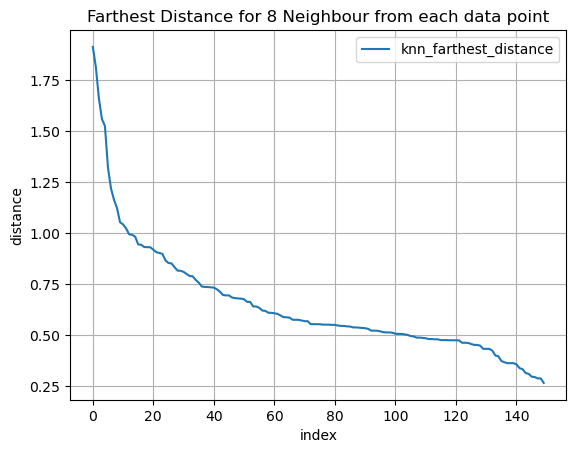

In [48]:
# Farthest Distance for 8 Neighbour from each data point 
df.sort_values('knn_farthest_distance',ascending=False).reset_index()[['knn_farthest_distance']].plot()
print(df.sort_values('knn_farthest_distance',ascending=False).reset_index().head())
plt.xlabel('index')
plt.ylabel('distance')
plt.title('Farthest Distance for 8 Neighbour from each data point')
plt.grid(True)
plt.show()

# Inference
# Many will have different value of eps respectively
# Calculate Silhouette Distance to under the seperation between clusters

In [49]:
# eps range will be more than 0
# Higher value depends on the scaling
# If Scaling is from 0-1 then eps range is from 0-1 or else it may have higher values greater than 1

df = df.iloc[:,:-1] # Removing 'KNN_Farthest_Distance' Column from dataset in order to do clustering
second_model = DBSCAN(eps = 0.7, min_samples=min_samples)
df['clusters'] = second_model.fit_predict(df)
print("Frequency of DBScan Output Cluster v1")
print(df.clusters.value_counts())

# Original Cluster
print("\nOriginal Cluster")
print(freq_2)

Frequency of DBScan Output Cluster v1
 1    86
 0    47
-1    17
Name: clusters, dtype: int64

Original Cluster
{0: 50, 1: 50, 2: 50}
